In [1]:
import os
import numpy as np
import pandas as pd
import pathlib
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 as cv
import pickle

%matplotlib inline

In [8]:
img1 = cv.imread(("/dasio/AI5758/snapshots/snapshots-2021-09-05/img-2021-09-05T09-08-46devID1.jpg"), cv.COLOR_BGR2RGB)
img2 = cv.imread(("/dasio/AI5758/snapshots/snapshots-2021-09-05/img-2021-09-05T09-08-46devID2.jpg"), cv.COLOR_BGR2RGB)
img_mask1 = cv.imread(("mask100.jpg"),0)
img_mask2 = cv.imread(("mask200.jpg"),0)
img1 = cv.bitwise_and(img1,img1,mask = img_mask1)
img2 = cv.bitwise_and(img2,img2,mask = img_mask2)
dist_from_mask1 = cv.distanceTransform(cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cv.DIST_L2, 3)
dist_from_mask2 = cv.distanceTransform(cv.cvtColor(img2, cv.COLOR_BGR2GRAY), cv.DIST_L2, 3)


In [9]:
# def SIFT_detect(img1, img2):
#     sift = cv.SIFT_create()
#     kp1, dst1 = sift.detectAndCompute(img1, None)
#     kp2, dst2 = sift.detectAndCompute(img2, None)

#     # место для dist для 1 и 2 снимка, сравнивать дистанцию до маски на обоих снимках через сложное условие


#     kp1_filtered = [
#         list_element for list_element in kp1 if condition1(list_element.pt, dist_from_mask1)]
#     dst1_filtered = np.array(
#         [dsc for (dsc, kp) in zip(dst1, kp1) if condition1(kp.pt,dist_from_mask1)])
#     kp2_filtered = [
#         list_element for list_element in kp2 if condition2(list_element.pt,dist_from_mask2)]
#     dst2_filtered = np.array(
#         [dsc for (dsc, kp) in zip(dst2, kp2) if condition2(kp.pt,dist_from_mask2)])
#     bf = cv.BFMatcher.create(cv.NORM_L2)
#     matches = bf.knnMatch(dst1_filtered, dst2_filtered, k=1)
#     #result = cv.drawMatchesKnn(img1, kp1_filtered, img2, kp2_filtered, matches, flags = 2,  outImg=None)
#     return kp1_filtered, kp2_filtered, matches


# def condition(list_with_coord): # закинуть dist в саму функцию
#     return np.sqrt((list_with_coord[0]-960)**2+(list_with_coord[1]-960)**2) 

# # условие для фильтрации наиболее близких точек к центру фотоснимка
# def condition1(list_with_coord, dist_from_mask1): # закинуть dist в саму функцию
#     #x = int(list_with_coord[0])
#     list_with_coord = np.array(list_with_coord).astype(int)
#     #y = int(list_with_coord[1])
#     ##dist_from_mask1 = np.array(dist_from_mask1).astype(int)
#     # list_with_coord = np.array(list_with_coord).astype(int)
#     # dist_from_mask1 = np.array(dist_from_mask1).astype(int)

#     return np.sqrt((list_with_coord[0]-960)**2+(list_with_coord[1]-960)**2) <= 500 & dist_from_mask1[list_with_coord[0]][list_with_coord[1]] >= 5

# def condition2(list_with_coord, dist_from_mask2): # закинуть dist в саму функцию
#     list_with_coord = np.array(list_with_coord).astype(int)
#     dist_from_mask2 = np.array(dist_from_mask1).astype(int)
#     return np.sqrt((list_with_coord[0]-960)**2+(list_with_coord[1]-960)**2) <= 500 & dist_from_mask2[list_with_coord[0]][list_with_coord[1]] >= 5
#     # сюда сложным условием запихать близость к маске


In [10]:
def SIFT_detect(img1, img2):
    sift = cv.SIFT_create()
    kp1, dst1 = sift.detectAndCompute(img1, None)
    kp2, dst2 = sift.detectAndCompute(img2, None)

    kp1_filtered = [
        list_element for list_element in kp1 if condition(list_element.pt, dist_from_mask1)]
    dst1_filtered = np.array(
        [dsc for (dsc, kp) in zip(dst1, kp1) if condition(kp.pt,dist_from_mask1)])
    kp2_filtered = [
        list_element for list_element in kp2 if condition(list_element.pt,dist_from_mask2)]
    dst2_filtered = np.array(
        [dsc for (dsc, kp) in zip(dst2, kp2) if condition(kp.pt,dist_from_mask2)])
    bf = cv.BFMatcher.create(cv.NORM_L2)
    matches = bf.knnMatch(dst1_filtered, dst2_filtered, k=1)
    #result = cv.drawMatchesKnn(img1, kp1_filtered, img2, kp2_filtered, matches, flags = 2,  outImg=None)
    return kp1_filtered, kp2_filtered, matches


def condition(list_with_coord, dist_from_mask): # закинуть dist в саму функцию
    x = int(list_with_coord[0])
    y = int(list_with_coord[1])
    return dist_from_mask[x][y] >= 50 and np.sqrt((x-960)**2+(y-960)**2) <= 500


In [11]:
kp1_filtered, kp2_filtered, matches = SIFT_detect(img1, img2)


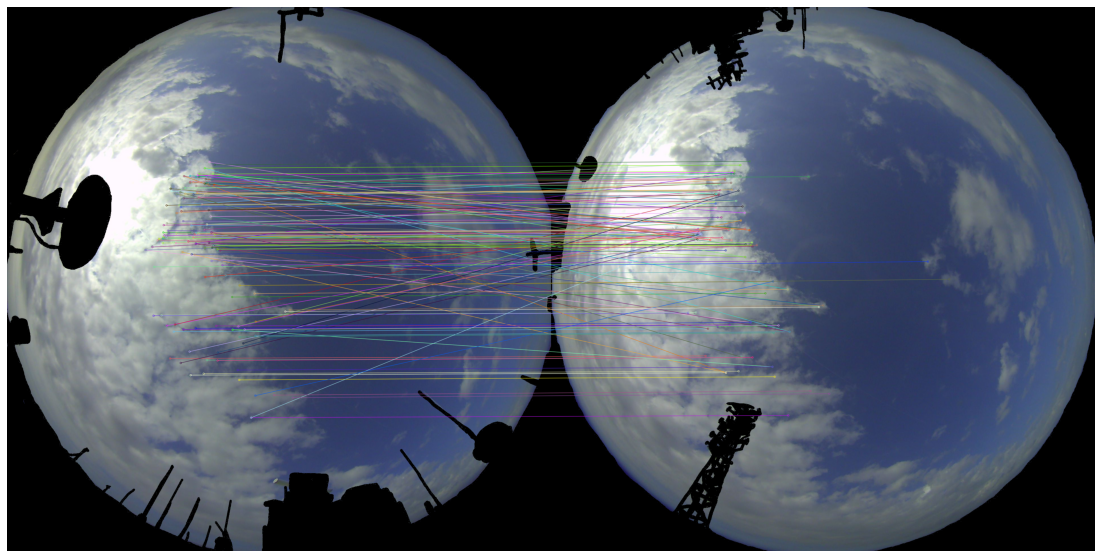

In [12]:
#result = cv.drawMatchesKnn(img1, kp1_filtered, img2, kp2_filtered, matches, flags = 2,  outImg=None)
kp1_filtered, kp2_filtered, matches = SIFT_detect(img1, img2)
result = cv.drawMatchesKnn(img1, kp1_filtered, img2, kp2_filtered, matches, flags = 2,  outImg=None)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
#cv.calcHist()
plt.rcParams['figure.figsize'] = [20.0, 10.0]
#plt.title('Best Matching Points')
plt.axis('off')
plt.imshow(result)
plt.show()

1. каким образом  cv.BFMatcher.create(cv.NORM_L2) работает
2. количество соседей  bf.knnMatch(dst1_filtered, dst2_filtered, k=1) К = 2,3?
3. гистограмма расстояний между совпадающими точками в пикселях
4.  cv2.distanceTransform - фильтровать на близость к маске


In [13]:
# отсев нескольких точек по дистанции между векторами дескрипторов

    # correct_matches = []
    # for m, n in matches:
    #     if m.distance < 0.75*n.distance:
    #         correct_matches.append([m])
    #         correct_matches_dct[image.split('.')[0]]


# cv2.distanceTransform - фильтровать на близость к маске

# $$H =   \frac{L}{\alpha} = \frac {L}{\frac{S \pi}{1920}} = \frac{1920L}{S \pi}$$
L - расстояние между камерами
S - расстояние между ключевыми точками после преобразования координат
# L = 33,70933727 Метра

# $$ \alpha  = \frac {180^{\circ} * S}{1920} * \frac{\pi}{180^{\circ}} = \frac{S \pi}{1920}$$

In [14]:
trasnformation_matrix = np.array([[np.cos(3.02474397e-09), -np.sin(3.02474397e-09), 1.04715269e-06], [np.sin(3.02474397e-09), np.cos(3.02474397e-09), -2.81405565e-06], [0, 0, 1]])
trasnformation_matrix

array([[ 1.00000000e+00, -3.02474397e-09,  1.04715269e-06],
       [ 3.02474397e-09,  1.00000000e+00, -2.81405565e-06],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [46]:
trasnformation_matrix = np.array([[np.cos(3.02474397e-09), -np.sin(3.02474397e-09), 1.04715269e-06], [np.sin(3.02474397e-09), np.cos(3.02474397e-09), -2.81405565e-06], [0, 0, 1]])
array_coord_old = np.array([list_element.pt for list_element in kp1_filtered])
array_coord_old = np.concatenate([array_coord_old, np.ones((len(array_coord_old), 1))], axis = 1)
new_coord_matrix = np.dot(trasnformation_matrix, array_coord_old.T).T


array_idx_1to2 = np.array([list_element[0].trainIdx for list_element in matches])
sorted_coord1 = np.array([list_element.pt for list_element in kp1_filtered])
sorted_coord2 = np.array([kp2_filtered.pt for (array_idx_1to2, kp2_filtered) in zip(array_idx_1to2, kp2_filtered)])


if sorted_coord1.shape[0] > sorted_coord2.shape[0]:
    sorted_coord1= sorted_coord1[:sorted_coord2.shape[0]]
else :
    sorted_coord2= sorted_coord2[:sorted_coord1.shape[0]]
difference = sorted_coord1.T - sorted_coord2.T

S = np.sqrt(difference[0]**2 + difference[1]**2)
H = (1920*33.70933727)/(S*3.14) # ghjdthbnm
H.shape

(126,)

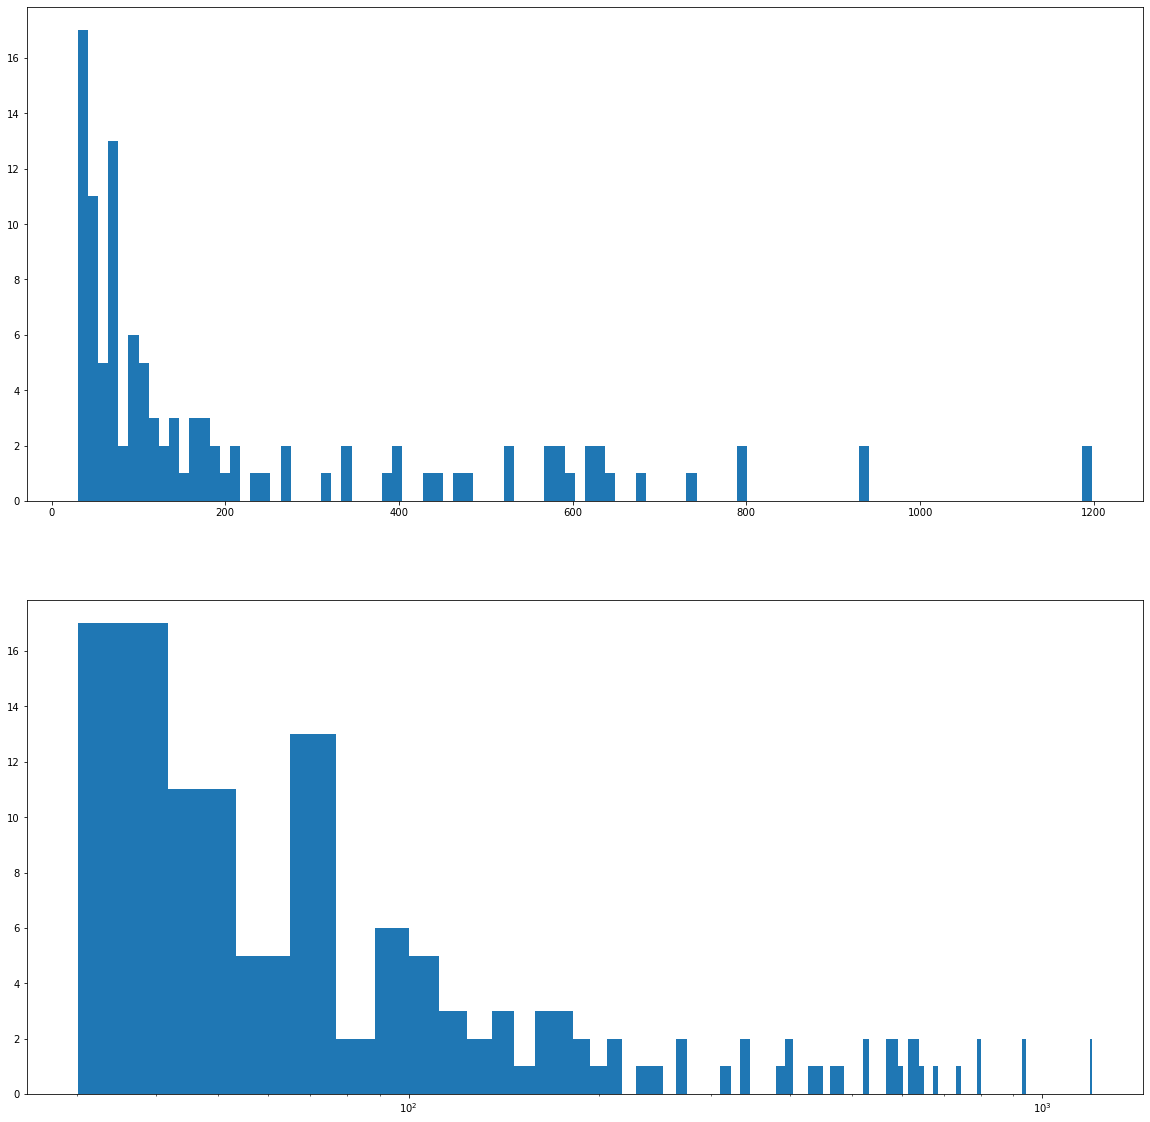

In [47]:
x = np.percentile(H, [5,95])
H_filtered = np.array([H for H in H if x[0]<=H<=x[1] ])
# histogram on linear scale
plt.figure(figsize=(20,20))

plt.subplot(211)
plt.hist(H_filtered,bins = 100)

# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale..logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(H_filtered,bins = 100)
plt.xscale('log')
plt.show()

In [141]:
distance = np.sqrt(difference.T[0]**2+difference.T[1]**2)
H = distance*(1920*33.70933727) # ghjdthbnm
H

array([ 1817348.78790788, 14348098.68890573,  4166551.26394358,
       18064051.57194541,  6841444.64328774,  2144272.16024302,
        2104917.98067024,  2522152.22149437,  2278398.05287739,
        2295849.78316425,  2304266.69136654,  2335384.27191667,
        2229952.51800924,  2560841.19883162,  2072676.92262648,
        1950840.744435  ,  5764978.93930786, 34393636.51621523,
         675894.0057085 ,   942895.34136531, 24094058.75161064,
        2860110.8582265 ,  1669294.80468267, 27104223.49242843,
        7565679.11312845,  3039463.64404506,   778355.61975839,
       11567973.79951414, 29275734.39005715,  3307139.75401235,
       29809290.53445978,  6920459.42255163, 18794789.65655271,
       20977458.45305251, 30213380.030645  , 25890550.88575737,
        3068675.18193439,  1431614.51445343,  1434253.33907509,
       38867437.77125784,  1106764.63887527,  3974966.88101604,
        6243349.37888752,  1665820.95351811,  3457547.12359768,
        9717538.33515104, 34232599.55445

In [135]:
distance

array([ 28.07933658, 221.68837101,  64.37619245, 279.10249669,
       105.70520535,  33.13053614,  32.52248597,  38.96905294,
        35.20287697,  35.47251866,  35.6025659 ,  36.08335475,
        34.45435886,  39.56682527,  32.02433859,  30.14188264,
        89.0730415 , 531.40624536,  10.44304506,  14.56840636,
       372.27041376,  44.19075522,  25.79179681, 418.77960863,
       116.8951451 ,  46.96188384,  12.02615016, 178.73345612,
       452.33100271,  51.09767089, 460.57482617, 106.92604012,
       290.39292193, 324.11671352, 466.81829745, 400.02750015,
        47.41322296,  22.11946659,  22.16023832, 600.52966958,
        17.10030403,  61.41607692,  96.4642064 ,  25.73812333,
        53.42157216, 150.14290677, 528.9181093 , 379.6873457 ,
       183.88670427, 694.08575237, 694.08575237, 144.11902762,
        10.00684534, 127.83764967,  42.86981274, 432.98662315,
       163.37625469, 505.36841127, 189.51122303, 189.51122303,
       678.73214801, 678.73214801, 183.97540529,  51.48

In [27]:
np.histogram(H, bins=10, range=None, normed=None, weights=None, density=None)

(array([ 11,   7,  11,  27,  27, 141,  13,   5,   6,   4]),
 array([-15551259.93793306, -12597372.28249045,  -9643484.62704785,
         -6689596.97160524,  -3735709.31616263,   -781821.66072003,
          2172065.99472258,   5125953.65016519,   8079841.3056078 ,
         11033728.9610504 ,  13987616.61649301]))

In [28]:
x = np.percentile(H, [5,95])
H_filtered = np.array([H for H in H if x[0]<=H<=x[1] ])
# histogram on linear scale
plt.figure(figsize=(20,20))

plt.subplot(211)
plt.hist(H_filtered,bins = 100)

# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale..logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(H_filtered,bins = 100)
plt.xscale('log')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()